データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.471
                : 10. 正答率(テスト) = 0.4815
Generation: 20. 正答率(トレーニング) = 0.607
                : 20. 正答率(テスト) = 0.6446
Generation: 30. 正答率(トレーニング) = 0.708
                : 30. 正答率(テスト) = 0.6829
Generation: 40. 正答率(トレーニング) = 0.715
                : 40. 正答率(テスト) = 0.718
Generation: 50. 正答率(トレーニング) = 0.731
                : 50. 正答率(テスト) = 0.7356
Generation: 60. 正答率(トレーニング) = 0.748
                : 60. 正答率(テスト) = 0.7444
Generation: 70. 正答率(トレーニング) = 0.753
                : 70. 正答率(テスト) = 0.76
Generation: 80. 正答率(トレーニング) = 0.782
                : 80. 正答率(テスト) = 0.7651
Generation: 90. 正答率(トレーニング) = 0.752
                : 90. 正答率(テスト) = 0.7664
Generation: 100. 正答率(トレーニング) = 0.782
                : 100. 正答率(テスト) = 0.7752
Generation: 110. 正答率(トレーニング) = 0.799
                : 110. 正答率(テスト) = 0.7889
Generation: 120. 正答率(トレーニング) = 0.795
                : 120. 正答率(テスト) = 0.7944
Generation: 130. 正答率(トレーニング) = 0.783
                : 130. 正答率(テスト) = 0.80

Generation: 1070. 正答率(トレーニング) = 0.91
                : 1070. 正答率(テスト) = 0.9134
Generation: 1080. 正答率(トレーニング) = 0.904
                : 1080. 正答率(テスト) = 0.9149
Generation: 1090. 正答率(トレーニング) = 0.932
                : 1090. 正答率(テスト) = 0.9142
Generation: 1100. 正答率(トレーニング) = 0.929
                : 1100. 正答率(テスト) = 0.9153
Generation: 1110. 正答率(トレーニング) = 0.922
                : 1110. 正答率(テスト) = 0.9163
Generation: 1120. 正答率(トレーニング) = 0.926
                : 1120. 正答率(テスト) = 0.9171
Generation: 1130. 正答率(トレーニング) = 0.93
                : 1130. 正答率(テスト) = 0.9168
Generation: 1140. 正答率(トレーニング) = 0.937
                : 1140. 正答率(テスト) = 0.9186
Generation: 1150. 正答率(トレーニング) = 0.919
                : 1150. 正答率(テスト) = 0.9182
Generation: 1160. 正答率(トレーニング) = 0.92
                : 1160. 正答率(テスト) = 0.9183
Generation: 1170. 正答率(トレーニング) = 0.927
                : 1170. 正答率(テスト) = 0.9189
Generation: 1180. 正答率(トレーニング) = 0.928
                : 1180. 正答率(テスト) = 0.9183
Generation: 1190. 正答率(トレーニング) = 0.924
     

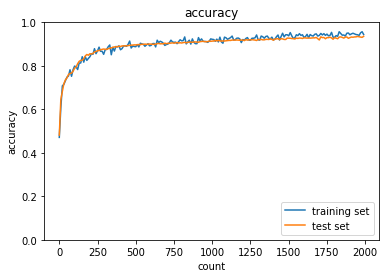

In [7]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


# batch_normalizationの設定
use_batchnorm = True


network = layers.MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='sigmoid', weight_init_std='Xavier', use_batchnorm=use_batchnorm)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 1000
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()